In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 11.3 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FRb8JrNKJ3yTOi0j4WwS")
project = rf.workspace("yazid-cml1s").project("fer-obj")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fer-obj-3 in yolov8:: 100%|██████████| 512/512 [00:00<00:00, 8391.72it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=20 batch=16 optimizer=SGD

100% 83.7M/83.7M [00:00<00:00, 324MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/fer-obj-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [5]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/fer-obj-3/data.yaml plots=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,612,005 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/fer-obj-3/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.14it/s]
                   all         21         21      0.148      0.579      0.365      0.365
                 angry          3          3      0.147          1      0.736      0.736
               disgust          3          3          0          0      0.176      0.176
                  fear          4          4       0.19          1      0.284      0.284
                 happy          3          3      0.336      0.667      0.538      0.538
               neutral          2          2      0.106        0.5     0.0913     0.0913
                   sad          3          3      0.125 

In [7]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/fer-obj-3/test/images

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,612,005 parameters, 0 gradients, 164.8 GFLOPs

image 1/10 /content/fer-obj-3/test/images/Angry_364963_jpg.rf.e90d6e2a7b93c274446d1c99f7fdfb70.jpg: 640x640 1 angry, 59.4ms
image 2/10 /content/fer-obj-3/test/images/Disgust_3858356_jpg.rf.ee662bb85a67fba8c105e476c89d2e10.jpg: 640x640 1 disgust, 52.6ms
image 3/10 /content/fer-obj-3/test/images/Fear_318555_jpg.rf.0a49d5b8bdffda42eb36dab948e80192.jpg: 640x640 1 neutral, 52.5ms
image 4/10 /content/fer-obj-3/test/images/Happy_109676_jpg.rf.58e115fe2d4470e3f0b315ac6c88da2e.jpg: 640x640 1 disgust, 47.1ms
image 5/10 /content/fer-obj-3/test/images/Happy_1206_jpg.rf.c19f87335d6dff6d20cb94eeefde4b6a.jpg: 640x640 (no detections), 37.2ms
image 6/10 /content/fer-obj-3/test/images/Neutral_242815_jpg.rf.8232da681fd713fd56666f31c8951d22.jpg: 640x640 1 angry, 36.6ms
image 7/10 /content/fer-obj-3/test/images/Sad_396906_jpg.rf.a028361fd6527

Found 10 test images.

0: 640x640 1 angry, 62.6ms
Speed: 2.2ms preprocess, 62.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 disgust, 62.4ms
Speed: 2.0ms preprocess, 62.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 surpirse, 34.1ms
Speed: 2.5ms preprocess, 34.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 33.5ms
Speed: 2.4ms preprocess, 33.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 neutral, 34.6ms
Speed: 1.9ms preprocess, 34.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 angry, 33.5ms
Speed: 1.9ms preprocess, 33.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 disgust, 32.9ms
Speed: 1.9ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 surpirse, 31.6ms
Speed: 1.9ms preprocess, 31.6ms inference, 1.6ms postpr

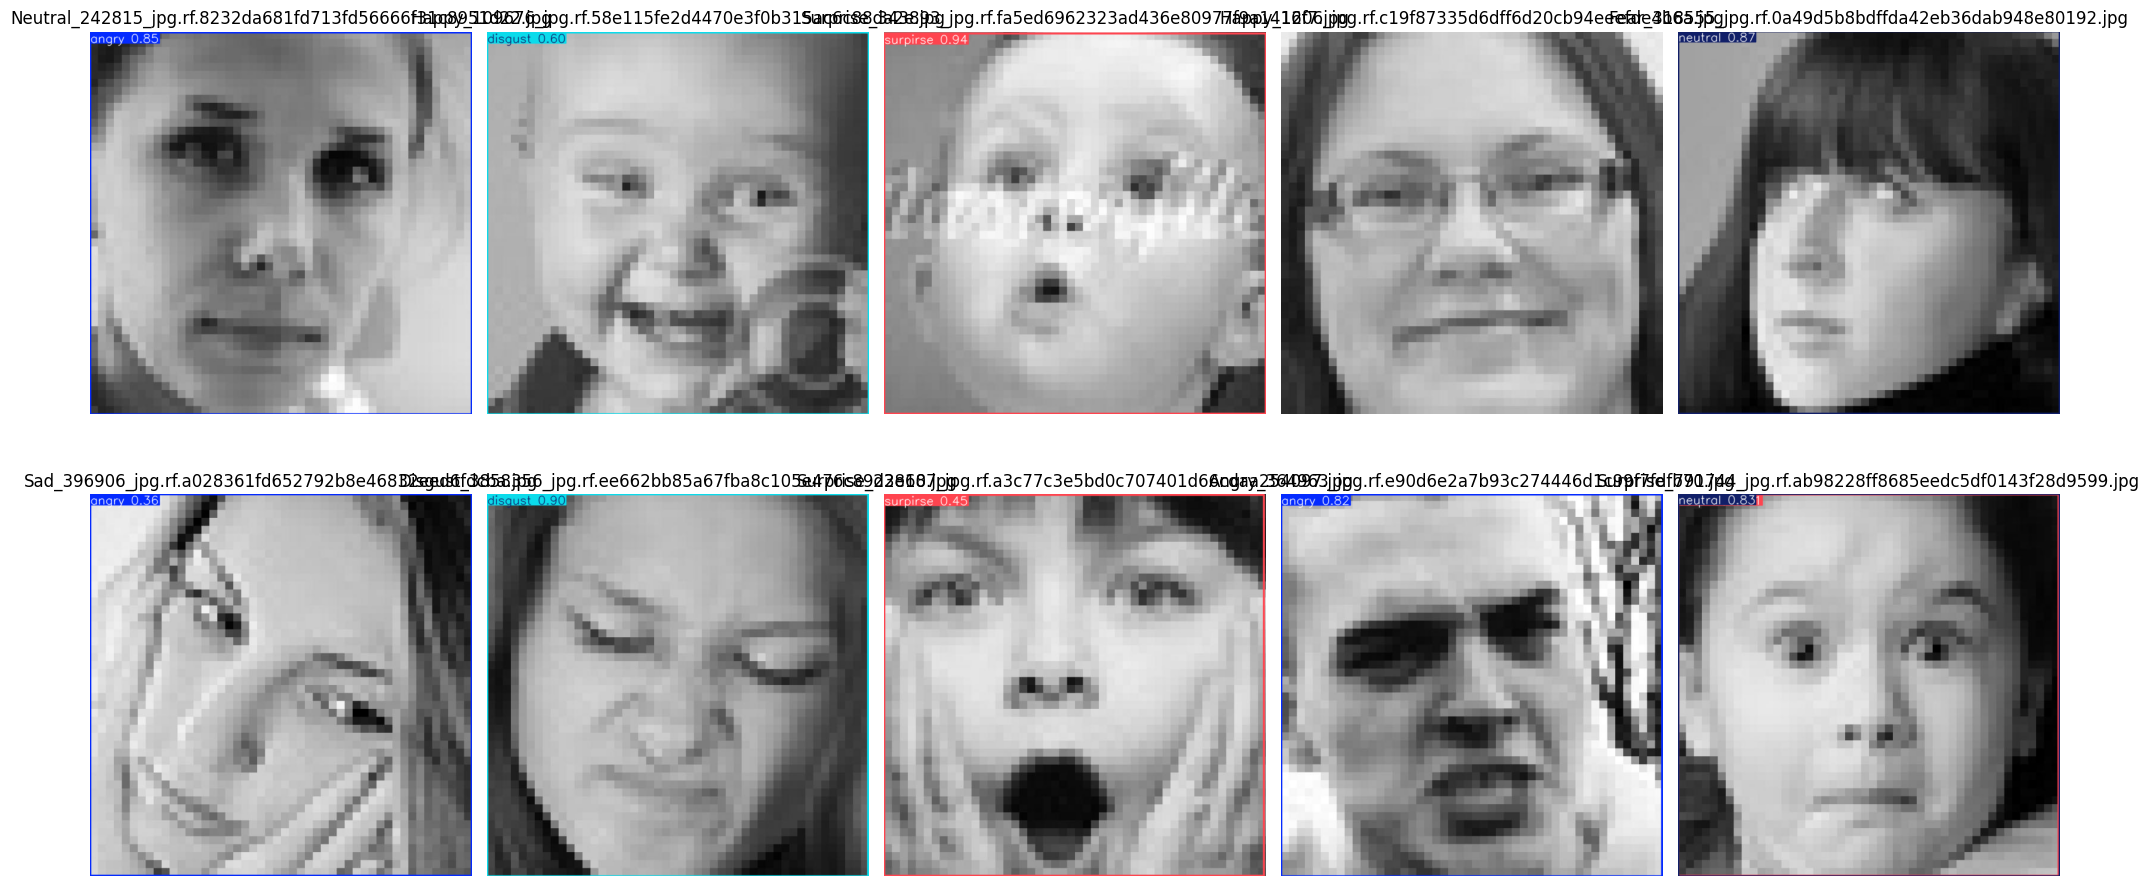

In [19]:
import cv2
import glob
import matplotlib.pyplot as plt
from ultralytics import YOLO

model_path = '/content/runs/detect/train/weights/best.pt'
yolo_model = YOLO(model_path)

test_images = glob.glob('/content/fer-obj-3/test/images/*.jpg')

if not test_images:
    print("No test images found. Please check the path.")
else:
    print(f"Found {len(test_images)} test images.")

max_images_per_row = 5
num_images = len(test_images)

fig, axes = plt.subplots((num_images // max_images_per_row) + (num_images % max_images_per_row > 0), max_images_per_row, figsize=(20, 5 * ((num_images // max_images_per_row) + (num_images % max_images_per_row > 0))))

if num_images <= max_images_per_row:
    axes = [axes]

for idx, img_path in enumerate(test_images):
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error loading image: {img_path}")
        continue

    results = yolo_model.predict(image)

    if not results:
        print(f"No results for image: {img_path}")
        continue

    annotated_image = results[0].plot()

    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    ax = axes[idx // max_images_per_row][idx % max_images_per_row]
    ax.imshow(annotated_image)
    ax.axis('off')
    ax.set_title(f"{img_path.split('/')[-1]}")

for j in range(num_images, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()
